# Libraries

In [1]:
# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model evaluation
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import confusion_matrix ,classification_report
from sklearn.metrics import precision_score , recall_score , f1_score
from sklearn.metrics import roc_curve

# Load Data

In [2]:

df = pd.read_csv("heart-disease.csv")
df.shape # (rows , columns)

(303, 14)

# Data Exploration ( exploratory data analysis or EDA)
The goal here is to find out more about the data and become a subject matter expert on the dataset you're working with.

1. What questions are you trying to solve ?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with?
4. Where are the outliers and why you should care them?
5. How can you add, change or remove features to get more out of your data? 


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

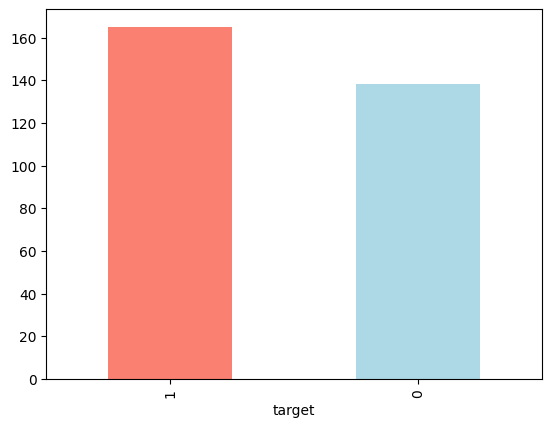

In [6]:
df['target'].value_counts().plot(kind="bar" , color = ["salmon" , 'lightblue'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Heart Disease Frequency according to Sex

In [10]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [11]:
# compare target column with sex column
pd.crosstab(df.target , df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

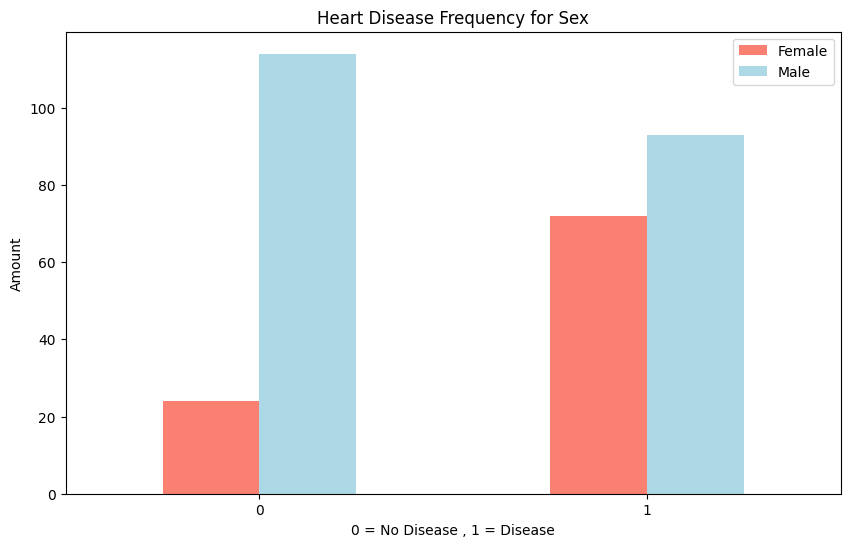

In [12]:
# create a plot of crosstab
pd.crosstab(df.target , df.sex).plot(kind="bar",
                                     figsize=(10 ,6),
                                     color = ['salmon' , 'lightblue'])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease , 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female" ,"Male"])
plt.xticks (rotation = 0)

# Age vs. Max Heart Rate for Heart Disease

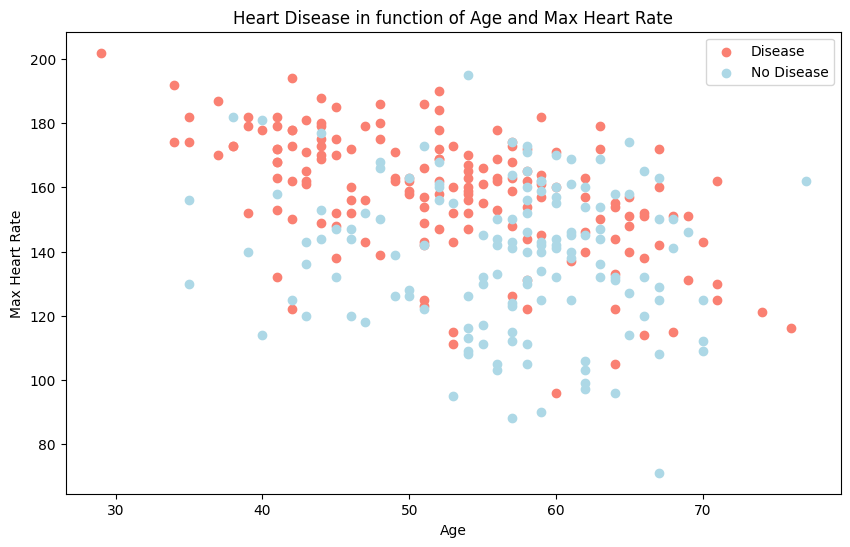

In [13]:
#Create another figure
plt.figure(figsize=(10, 6))

# scatter with positives examples
plt.scatter(df.age[df.target == 1],
            df.thalach[df.target == 1],
            c ='salmon')

# scatter with negatives examples
plt.scatter(df.age[df.target == 0] ,
            df.thalach[df.target == 0],
            c ='lightblue')

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(['Disease' ,"No Disease"]);

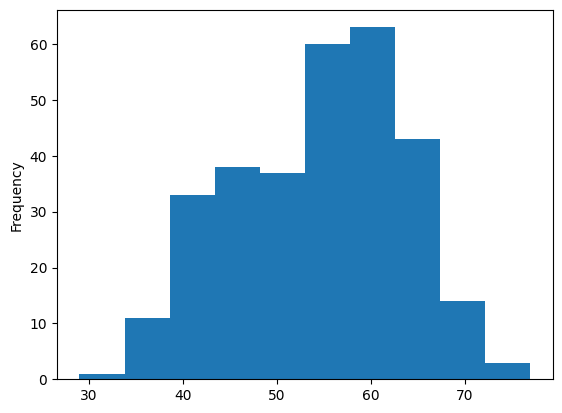

In [14]:
#  check the distribution of the age column with a histogram

df.age.plot.hist();

# Heart Disease Frequency per Chest Pain Type

In [15]:
pd.crosstab(df.cp , df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


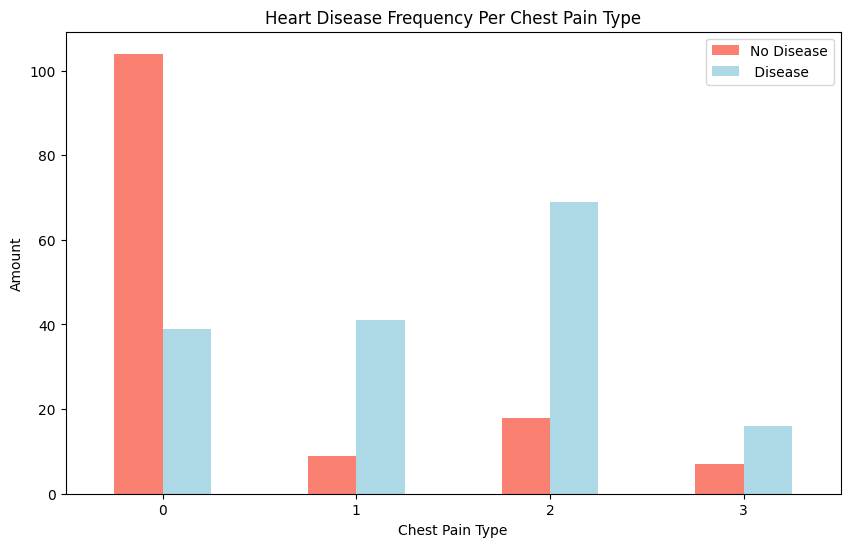

In [16]:
# Make the crosstab more visual
pd.crosstab(df.cp , df.target).plot(kind = 'bar',
                                    figsize=(10, 6),
                                    color = ["salmon" , "lightblue"]);

# Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease" , " Disease"])
plt.xticks(rotation=0);

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


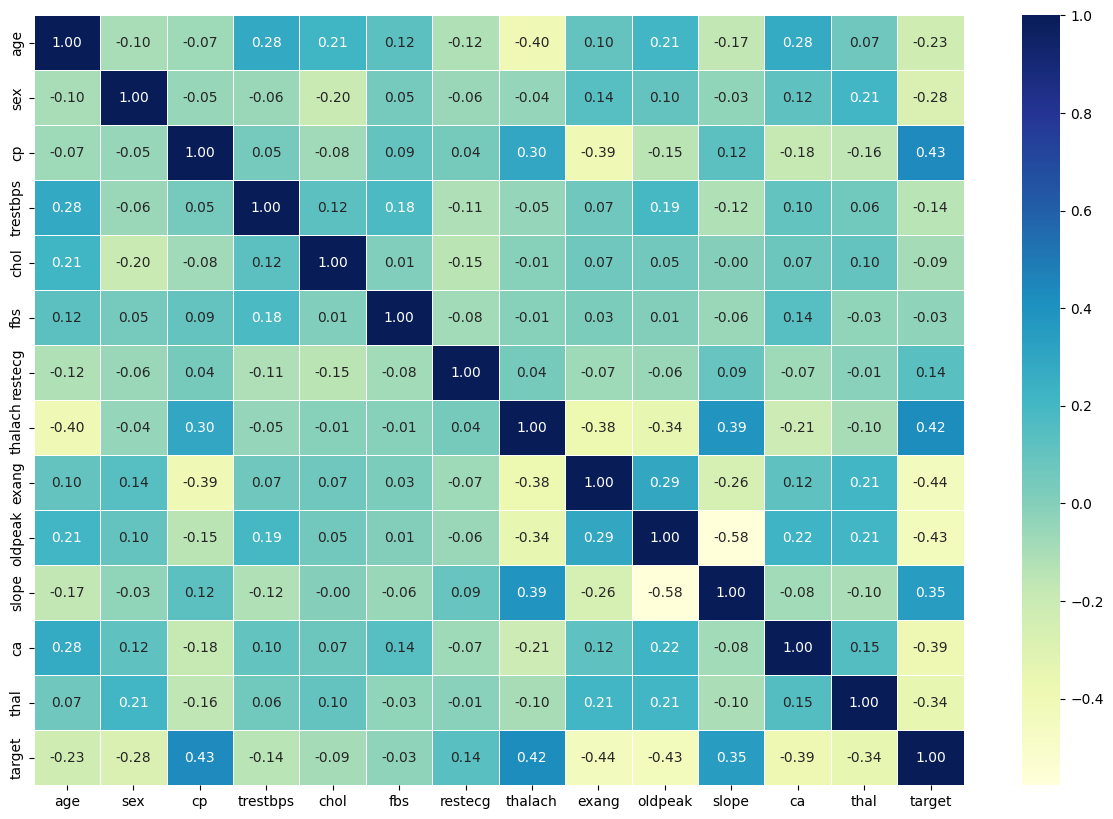

In [19]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig , ax = plt.subplots(figsize =(15 , 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt = ".2f",
                 cmap = "YlGnBu");


# Modelling


In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
# split data into x and y

x = df.drop('target' , axis = 1)
y = df.target


In [22]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [23]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [24]:
# split data into train and test set
np.random.seed(12)

# split into train and test set
x_train , x_test , y_train , y_test = train_test_split ( x, y , test_size= 0.2)

In [25]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
238,77,1,0,125,304,0,0,162,1,0.0,2,3,2
224,54,1,0,110,239,0,1,126,1,2.8,1,1,3
31,65,1,0,120,177,0,1,140,0,0.4,2,0,3
139,64,1,0,128,263,0,1,105,1,0.2,1,1,3
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,38,1,3,120,231,0,1,182,1,3.8,1,0,3
130,54,0,2,160,201,0,1,163,0,0.0,2,1,2
241,59,0,0,174,249,0,1,143,1,0.0,1,0,2
253,67,1,0,100,299,0,0,125,1,0.9,1,2,2


In [26]:
y_train

238    0
224    0
31     1
139    1
47     1
      ..
259    0
130    1
241    0
253    0
155    1
Name: target, Length: 242, dtype: int64

***We are going to try 3 different machine learning models:***
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier


In [27]:
# Put models in a dictionary
models = {"Logistic Regresson" : LogisticRegression(),
          "KNN" : KNeighborsClassifier(),
          "Random Forest" : RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models , x_train , x_test , y_train , y_test):
    '''
    Fits and evaluates given machine learning models.
    models : a dict of different scikit-learn machine learning models
    x_train : training data (no labels)
    x_test : testing data (no labels)
    y_train : training labels
    y_test : testing labels
    
    '''
    # Set random seed
    np.random.seed(33)
    
    # Make a dictionary to keep model scores
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores    

In [28]:
model_scores = fit_and_score(models = models,
                             x_train = x_train,
                             x_test = x_test,
                             y_train =  y_train,
                             y_test = y_test)
model_scores

c:\python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regresson': 0.7868852459016393,
 'KNN': 0.6557377049180327,
 'Random Forest': 0.819672131147541}

# Model Comparison

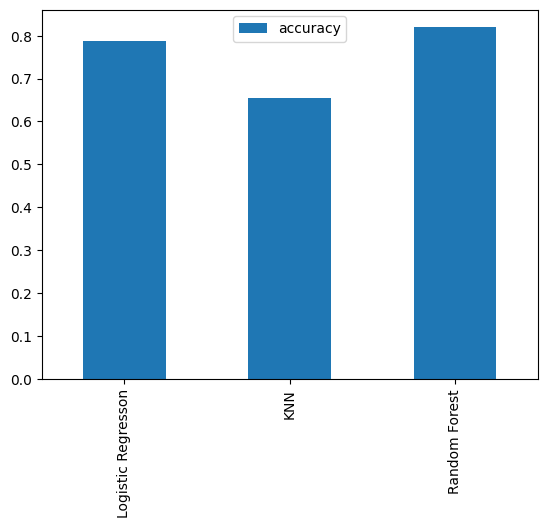

In [29]:
model_compare = pd.DataFrame(model_scores , index = ['accuracy'])
model_compare.T.plot.bar();

Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off.
What should we do?

***Let's look at the following:***
* Hyperparameter Tuning
* Feature importance
* Confusion Matrix
* Cross - Validation
* Precision
* Recall
* F1 Score
* Classification Report
* ROC Curve
* Area under the curve (AUC)

# Hyperparameter Tuning (By Hand)

In [30]:
# Let's tune KNN
train_scores = []
test_scores = []

# Create a list of different values for n_neighbours
neighbours = range(1 , 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbours
for i in neighbours:
    knn.set_params(n_neighbors = i)
    
    # Fit the algorithm
    knn.fit(x_train ,y_train)
    
    #Update the training scores list
    train_scores.append(knn.score(x_train , y_train))
    
    #Update the test score list
    test_scores.append(knn.score(x_test , y_test))
    
    


In [31]:
train_scores

[1.0,
 0.8016528925619835,
 0.7727272727272727,
 0.7644628099173554,
 0.78099173553719,
 0.7727272727272727,
 0.7396694214876033,
 0.7396694214876033,
 0.7272727272727273,
 0.7272727272727273,
 0.7066115702479339,
 0.7148760330578512,
 0.7024793388429752,
 0.7148760330578512,
 0.71900826446281,
 0.6900826446280992,
 0.6942148760330579,
 0.6983471074380165,
 0.6942148760330579,
 0.6942148760330579]

In [32]:
test_scores

[0.4918032786885246,
 0.5245901639344263,
 0.5409836065573771,
 0.6065573770491803,
 0.6557377049180327,
 0.6557377049180327,
 0.6557377049180327,
 0.6885245901639344,
 0.6885245901639344,
 0.6557377049180327,
 0.6721311475409836,
 0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.639344262295082,
 0.639344262295082,
 0.6229508196721312,
 0.6557377049180327,
 0.639344262295082,
 0.6721311475409836]

Maximum KNN score on the test data:  68.85%


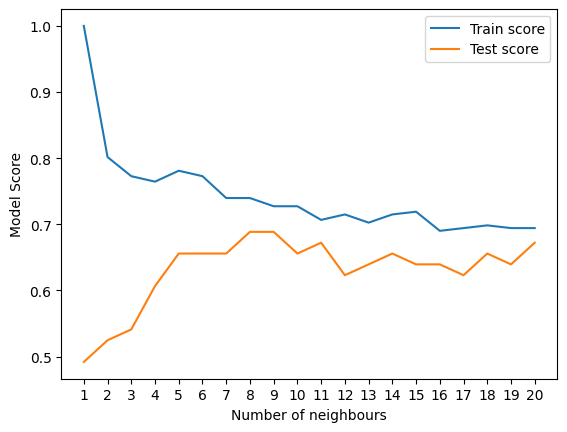

In [33]:
plt.plot(neighbours , train_scores , label = "Train score")
plt.plot(neighbours , test_scores , label = "Test score")
plt.xticks(np.arange(1 , 21 , 1))
plt.xlabel("Number of neighbours")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores) * 100 : .2f}%")

# Hyperparameter tuning with RandomizedSearchCV

***We're are going to tune:***
* Logistic Regression()
* RandomForestClassifier()

...using RandomizedSearchCV

In [34]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C" : np.logspace (-4 , 4 , 20) ,
                "solver" : ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators" : np.arange(10 , 1000 , 50) ,
           "max_depth" : [None , 3 , 5 , 10],
           "min_samples_split" : np.arange(2 ,20 ,2),
           "min_samples_leaf" : np.arange(1 , 20 , 2)}



***Now we've got hyperparameter grids setup for each of our models , let's tune them using RandomizedSearchCV***

In [35]:
# Tune Logistic Regression

np.random.seed (7)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv = 5,
                                n_iter = 20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train , y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [36]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [37]:
rs_log_reg.score(x_test , y_test)

0.7868852459016393

***Now we've tuned LogisticRegression() , Let's do the same for RamdomForestClassifier()***

In [38]:
# Setup Random seed
np.random.seed(7)

# Setup random hyperparameter search for RandomForestClassifier()
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rf_grid ,
                           cv = 5,
                           n_iter = 20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(x_train , y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [39]:
# Find the best parameters
rs_rf.best_params_ 

{'n_estimators': 860,
 'min_samples_split': 2,
 'min_samples_leaf': 17,
 'max_depth': 3}

In [40]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(x_test , y_test)

0.819672131147541

In [41]:
model_scores

{'Logistic Regresson': 0.7868852459016393,
 'KNN': 0.6557377049180327,
 'Random Forest': 0.819672131147541}

# Hyperparameter Tuning with GridSearchCV

Since our Random Forest model provides the best score so far , we'll try and improve them again using GridSearchCV

In [42]:
# Different hyperparameters for our RandomForestClassifier model
rf_grid = {"n_estimators" : np.arange(100 , 1000 , 900) ,
           "max_depth" : [None , 3 , 5 , 10],
           "min_samples_split" : np.arange(2 ,20 ,2),
           "min_samples_leaf" : np.arange(1 , 20 , 2)}

# Setup grid hyperparameter search for RandomForestClassifier
gs_rf_reg = GridSearchCV(RandomForestClassifier(),
                         param_grid=rf_grid,
                         cv = 5 ,
                         verbose=True)

# Fit grid hyperparater search model
gs_rf_reg.fit(x_train,y_train)



Fitting 5 folds for each of 360 candidates, totalling 1800 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 3, 5, 10],
                         'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                         'n_estimators': array([100])},
             verbose=True)

In [43]:
# Check the best hyperparameters
gs_rf_reg.best_params_

{'max_depth': 10,
 'min_samples_leaf': 15,
 'min_samples_split': 2,
 'n_estimators': 100}

In [44]:
# Evaluate the grid search RandomForestClassifier model
gs_rf_reg.score(x_test , y_test)

0.8032786885245902

In [45]:
model_scores

{'Logistic Regresson': 0.7868852459016393,
 'KNN': 0.6557377049180327,
 'Random Forest': 0.819672131147541}

# Evaluating our tuned machine learning classifier , beyond accuracy

* ROC Curve and AUC Score
* Confusion Matrix
* Classification report
* Precision
* Recall
* F1 - Score

...and it would be great if cross-validation was used where possible

To make comparisons and evaluate our trained model , first we need to make prediction

In [46]:
# Make predictions with tuned model
y_preds = gs_rf_reg.predict(x_test)

In [47]:
y_preds

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0], dtype=int64)

In [48]:
y_test

92     1
85     1
75     1
233    0
243    0
      ..
275    0
35     1
52     1
214    0
101    1
Name: target, Length: 61, dtype: int64

In [49]:
# Plot ROC Curve and calculate AUC metrics
#roc_curve(gs_rf_reg, x_test , y_test )


In [50]:
# Confusion matrix
print(confusion_matrix(y_test , y_preds))

[[24  7]
 [ 5 25]]


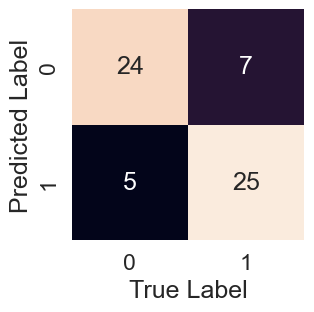

In [51]:
sns.set(font_scale = 1.5)

def plot_conf_matrix (y_test , y_preds):
    '''
    Plot a nice looking confusion matrix using seaborn's heatmap
    '''
    fig , ax = plt.subplots(figsize = (3 ,3))
    ax = sns.heatmap(confusion_matrix(y_test , y_preds),
                     annot=True,
                     cbar=False)
    
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    
plot_conf_matrix(y_test , y_preds)   

***Now we've got a ROC Curve , an AUC metric and a confusion matrix , Let's get a classification report as well as cross-validated precision ,recall and f1 score***

In [52]:
print(classification_report(y_test , y_preds))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        31
           1       0.78      0.83      0.81        30

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



# Calculate evaluation metrics using cross - validation
We're going to calculate accuracy, precision , recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`

In [53]:
# Check best hyperparameters
gs_rf_reg.best_params_

{'max_depth': 10,
 'min_samples_leaf': 15,
 'min_samples_split': 2,
 'n_estimators': 100}

In [54]:
# Create a new regression with best parameter
rg =  RandomForestClassifier( n_estimators = 100 ,
                              max_depth = 10,
                              min_samples_split = 2,
                              min_samples_leaf = 15)

In [55]:
#Cross-validated accuracy
cv_acc = cross_val_score(rg,
                         x,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8383060109289617

In [56]:
#Cross-validated precision
cv_precision = cross_val_score(rg,
                         x,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8276359041064925

In [57]:
#Cross-validated recall
cv_recall = cross_val_score(rg,
                         x,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall


0.8969696969696969

In [58]:
#Cross-validated f1-score
cv_f1 = cross_val_score(rg,
                         x,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8664702836279735

<Axes: title={'center': 'Cross- Validated Classification metrics'}>

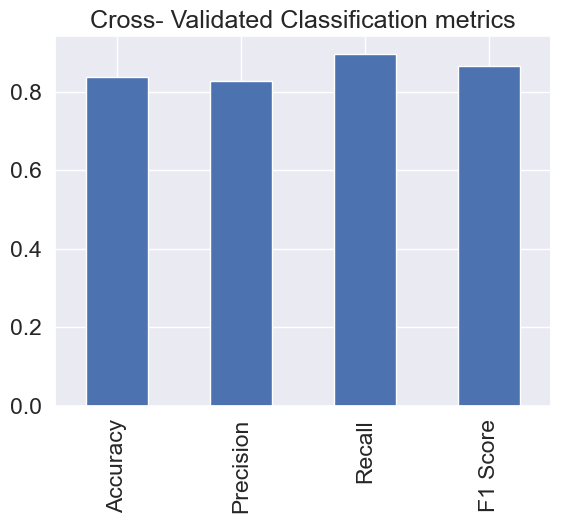

In [59]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame ({"Accuracy" : cv_acc,
                           "Precision" : cv_precision,
                           "Recall" : cv_recall,
                           "F1 Score" : cv_f1},
                           index = [0])
cv_metrics.T.plot.bar(title = "Cross- Validated Classification metrics" ,
                      legend = False)

In [60]:
clf = RandomForestClassifier( n_estimators = 100 ,
                              max_depth = 10,
                              min_samples_split = 2,
                              min_samples_leaf = 15)
clf.fit(x_train , y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=15)

In [61]:
# Check coef
clf.coef

AttributeError: 'RandomForestClassifier' object has no attribute 'co'